In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | vila
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | rafaela
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | sabratah
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | zabol
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | hambantota
Processing Record 22 of Set 1 | mataura

Processing Record 37 of Set 4 | hilo
Processing Record 38 of Set 4 | lucapa
Processing Record 39 of Set 4 | mwinilunga
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | savannah bight
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | east ridge
Processing Record 45 of Set 4 | toliary
City not found. Skipping...
Processing Record 46 of Set 4 | manggar
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | abu samrah
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | taburao
City not found. Skipping...
Processing Record 4 of Set 5 | asau
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | muswellbrook
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5

Processing Record 23 of Set 8 | tuy hoa
Processing Record 24 of Set 8 | tafresh
Processing Record 25 of Set 8 | christchurch
Processing Record 26 of Set 8 | tual
Processing Record 27 of Set 8 | ostrovnoy
Processing Record 28 of Set 8 | sakakah
Processing Record 29 of Set 8 | leh
Processing Record 30 of Set 8 | cisarua
Processing Record 31 of Set 8 | akcakoca
Processing Record 32 of Set 8 | atami
Processing Record 33 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 34 of Set 8 | manokwari
Processing Record 35 of Set 8 | banda aceh
Processing Record 36 of Set 8 | ray
Processing Record 37 of Set 8 | haibowan
City not found. Skipping...
Processing Record 38 of Set 8 | coruripe
Processing Record 39 of Set 8 | khasan
Processing Record 40 of Set 8 | amahai
Processing Record 41 of Set 8 | willmar
Processing Record 42 of Set 8 | bako
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | port-cartier
Processing Record 45 of Set 8 | gamba
Processing Record

Processing Record 12 of Set 12 | mount gambier
Processing Record 13 of Set 12 | kamalpur
Processing Record 14 of Set 12 | remanso
Processing Record 15 of Set 12 | manzil tamim
City not found. Skipping...
Processing Record 16 of Set 12 | cumberland
Processing Record 17 of Set 12 | cuamba
Processing Record 18 of Set 12 | zruc nad sazavou
Processing Record 19 of Set 12 | palauig
Processing Record 20 of Set 12 | palmer
Processing Record 21 of Set 12 | port moresby
Processing Record 22 of Set 12 | sao sebastiao do paraiso
Processing Record 23 of Set 12 | rio rancho
Processing Record 24 of Set 12 | saint-augustin
Processing Record 25 of Set 12 | moree
Processing Record 26 of Set 12 | fort frances
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | inyonga
Processing Record 29 of Set 12 | tecpan
Processing Record 30 of Set 12 | waingapu
Processing Record 31 of Set 12 | bud
Processing Record 32 of Set 12 | mastic beach
Processing Record 33 of Set 12 | cape coast
Processing R

In [10]:
print(len(city_data))


554


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,74.91,79,95,5.14,ID,2022-02-10 20:33:44
1,Kapaa,22.0752,-159.3190,77.47,71,0,3.00,US,2022-02-10 20:33:44
2,Port Alfred,-33.5906,26.8910,70.92,79,81,7.63,ZA,2022-02-10 20:29:11
3,Gaspe,48.8334,-64.4819,34.02,75,100,4.61,CA,2022-02-10 20:33:45
4,Cape Town,-33.9258,18.4232,68.09,62,0,8.05,ZA,2022-02-10 20:31:24
5,Vila,42.0304,-8.1588,46.74,79,69,2.35,PT,2022-02-10 20:33:45
6,Atuona,-9.8000,-139.0333,78.57,74,1,16.96,PF,2022-02-10 20:33:46
7,Rafaela,-31.2503,-61.4867,98.01,14,28,5.01,AR,2022-02-10 20:30:14
8,Dikson,73.5069,80.5464,7.29,91,100,27.60,RU,2022-02-10 20:29:16
9,New Norfolk,-42.7826,147.0587,57.76,58,53,2.01,AU,2022-02-10 20:33:46


In [12]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2022-02-10 20:33:44,-3.8004,102.2655,74.91,79,95,5.14
1,Kapaa,US,2022-02-10 20:33:44,22.0752,-159.3190,77.47,71,0,3.00
2,Port Alfred,ZA,2022-02-10 20:29:11,-33.5906,26.8910,70.92,79,81,7.63
3,Gaspe,CA,2022-02-10 20:33:45,48.8334,-64.4819,34.02,75,100,4.61
4,Cape Town,ZA,2022-02-10 20:31:24,-33.9258,18.4232,68.09,62,0,8.05
5,Vila,PT,2022-02-10 20:33:45,42.0304,-8.1588,46.74,79,69,2.35
6,Atuona,PF,2022-02-10 20:33:46,-9.8000,-139.0333,78.57,74,1,16.96
7,Rafaela,AR,2022-02-10 20:30:14,-31.2503,-61.4867,98.01,14,28,5.01
8,Dikson,RU,2022-02-10 20:29:16,73.5069,80.5464,7.29,91,100,27.60
9,New Norfolk,AU,2022-02-10 20:33:46,-42.7826,147.0587,57.76,58,53,2.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

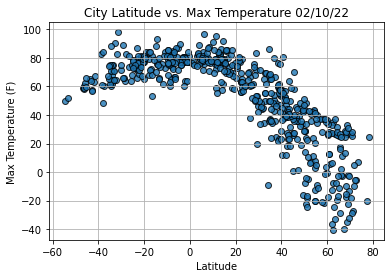

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

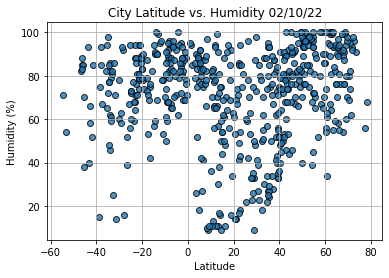

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

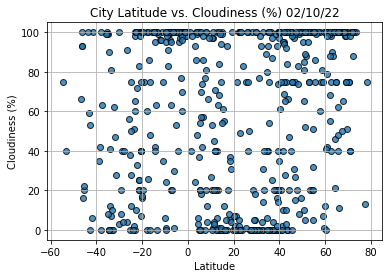

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

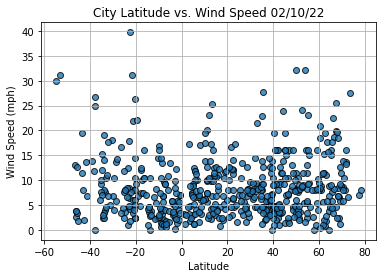

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2022-02-10 20:33:44,22.0752,-159.3190,77.47,71,0,3.00
3,Gaspe,CA,2022-02-10 20:33:45,48.8334,-64.4819,34.02,75,100,4.61
5,Vila,PT,2022-02-10 20:33:45,42.0304,-8.1588,46.74,79,69,2.35
8,Dikson,RU,2022-02-10 20:29:16,73.5069,80.5464,7.29,91,100,27.60
12,Sabratah,LY,2022-02-10 20:33:48,32.7933,12.4885,55.20,62,0,8.90


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

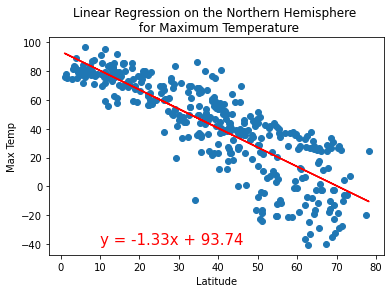

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,-40))

plt.show()

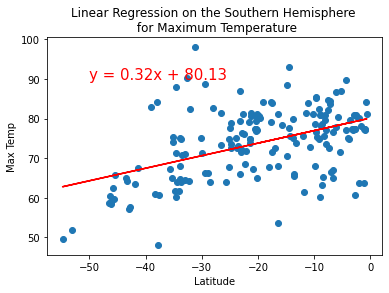

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

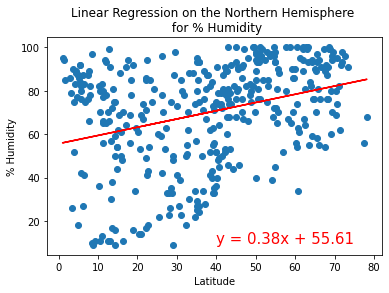

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

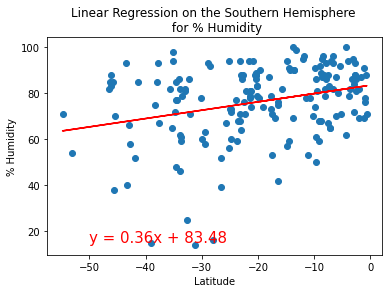

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

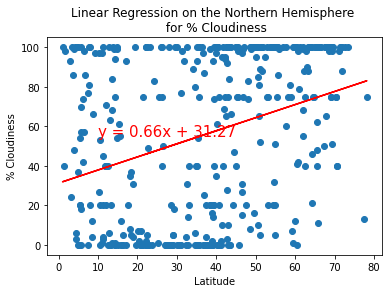

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

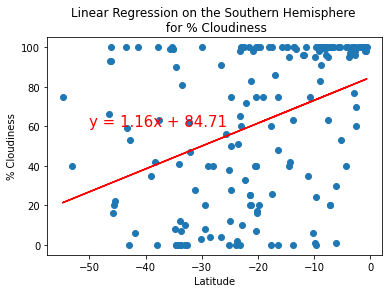

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

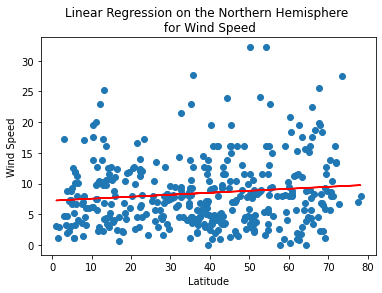

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

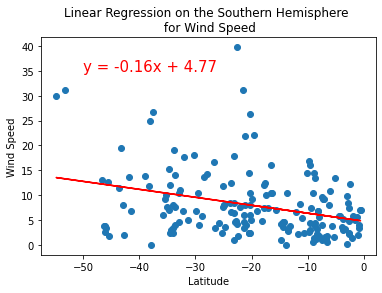

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))